In [2]:
"""
Tri-Beam Improbulator is a card in legends of runeterra that can create a variety of different follower cards.
This file plots a graph of the mana cost of these followers against the average stats they have.
"""
import statistics as stats

import matplotlib.pyplot as plt  # pylint: disable=import-error


class Card:
    """
    A class used to represent a card
     Attributes
    ----------
    name : str
        the name of the Card
    mana_cost : int
        the mana required to play the card
    power : int
        the attack power of the card
    health : int
        the amount of damage the card can take before being destroyed
    """

    def __init__(self, name, mana_cost, power, health):
        self.name = name
        self.mana_cost = int(mana_cost)
        self.power = int(power)
        self.health = int(health)

    def stat_total(self):
        """The total stats for a card"""
        return self.power + self.health

    def efficiency(self):
        """the total stats divided by the mana_cost"""
        return (self.power + self.health) / (self.mana_cost + 1)


def average_result(card_list):
    """Creates a dictionary of the average stat outcome for each possible mana cost of tri-beam"""
    return {mana_cost: average(mana_cost, card_list) for mana_cost in range(1, 11)}


def average(mana_cost, card_list):
    """Finds the average stat value for a specific mana cost of follower"""
    cards = [card for card in card_list if card.mana_cost == mana_cost]
    return stats.mean(card.power for card in cards), stats.mean(
        card.health for card in cards
    )


with open("follower_data.txt") as file:
    card_list = [Card(*(line.split("\t"))) for line in file]


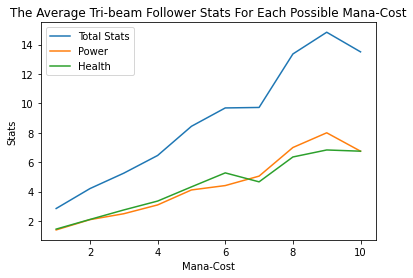

In [4]:
_, axis = plt.subplots()
axis.plot(
    average_result(card_list).keys(),
    [sum(y) for y in average_result(card_list).values()],
    label="Total Stats",
)
axis.plot(
    average_result(card_list).keys(),
    average_result(card_list).values(),
    label=("Power", "Health"),
)
axis.legend()
plt.title("The Average Tri-beam Follower Stats For Each Possible Mana-Cost")
plt.xlabel("Mana-Cost")
plt.ylabel("Stats")
plt.show()


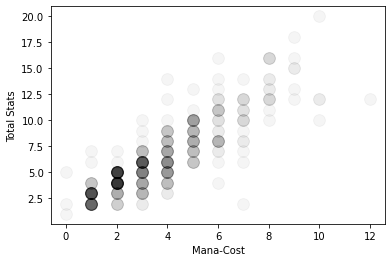

In [5]:
x_axis = [card.mana_cost for card in card_list]
power = [card.power for card in card_list]
health = [card.health for card in card_list]
total = [card.power + card.health for card in card_list]
size = 140
plt.scatter(x_axis, total, size, c="black", alpha=0.04)
plt.xlabel("Mana-Cost")
plt.ylabel("Total Stats")
plt.show()

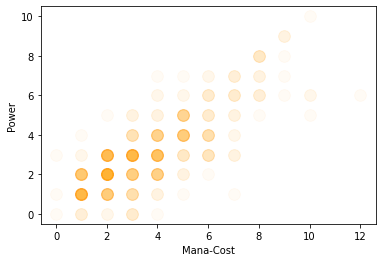

In [6]:
plt.scatter(x_axis, power, size, c="orange", alpha=0.04)
plt.xlabel("Mana-Cost")
plt.ylabel("Power")
plt.show()


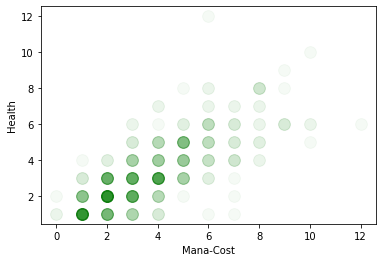

In [7]:
plt.scatter(x_axis, health, size, c="g", alpha=0.04)
plt.xlabel("Mana-Cost")
plt.ylabel("Health")
plt.show()